## **Singlet yield**

In [1]:
import matplotlib.pyplot as plt
import qutip as qt
import numpy as np
import time

In [2]:
import cmath

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

\begin{equation}
\begin{aligned}
& \hbar = 6.582 \times 10^{-16} ev \cdot s = 1.054 \times 10^{-34} J \cdot s \\
& \gamma = \frac{1}{2}\mu_{B}g \rightarrow  g = 2 \rightarrow   \gamma = \mu_{B}\\
& \mu_{B} = \frac{e \hbar}{2 m_{e}} = 5.788 \times 10^{-5} \frac{ev}{T} = 5.788 \times 10^{-11} \frac{ev}{\mu T} = 9.274 \times 10^{-24} \frac{J}{T}\\
& \frac{\hbar}{\mu_{0}} = 1.13718 \times 10^{-5} \mu T \cdot s \rightarrow Unidad.de.tiempo = U_{t} = 1.13718 \times 10^{-5} s = 11.3718 \mu s  \\
& t = np.linspace(0.0,5.784,100000) = np.linspace(0.0*U_{t},5.784*U_{t},100000) = 0 s  \rightarrow  6.582 \times 10^{-5} s
\label{equation:unidades}
\end{aligned}
\end{equation}

In [4]:
start_time = time.time()

t = np.linspace(0.0,50.0,1000)

\begin{equation}
\begin{aligned}
\boldsymbol{B} = B_{0}(\sin{\theta}\cos{\phi}, \sin{\theta}\sin{\phi},\cos{\theta}) \quad  
 B_{x} = B_{0}\sin{\theta}\cos{\phi} \quad  
 B_{y} = B_{0}\sin{\theta}\sin{\phi} \quad
 B_{z} = B_{0}\cos{\theta} 
\end{aligned}
\label{equation:campo_magentico}
\end{equation}

\begin{equation}
\phi = \varphi = 0 \quad \boldsymbol{B} = (B_{x},0,B_{z}) \quad
       B_{x} = B_{0}\sin{\theta}  = Bx1   \quad B_{y} = 0 \quad B_{z} = B_{0}\cos{\theta} = Bz1
\label{equation:campo_magentico_con_By_cero}
\end{equation}

In [5]:
def Bx(B0,theta1):
    Bx1     = B0*np.sin(theta1);
    return Bx1

def Bz(B0,theta1):
    Bz1   = B0*np.cos(theta1);
    return Bz1

\begin{equation}
\begin{aligned}
H &= \gamma \boldsymbol{B} \cdot (\boldsymbol{S_{1}} + \boldsymbol{S_{2}}) + \boldsymbol{S_{1}} \cdot \boldsymbol{A} \cdot I \\
H & = \gamma B_{x}(\sigma_{x}^1 + \sigma_{x}^2) + \gamma B_{z}(\sigma_{z}^1 + \sigma_{z}^2) + A_{xx} I_{x} \sigma_{x}^1 + A_{yy} I_{y} \sigma_{y}^1 + A_{zz} I_{z} \sigma_{z}^1
\end{aligned}
\label{equation:hamiltoniano_PR}
\end{equation}

\begin{equation}
H_{(\uparrow, \downarrow)} = 
\begin{bmatrix} 
 2\gamma B_{z}+A_{z}I_{z}            & \gamma B_{x} & \gamma B_{x}+A_{x}I_{x}-iA_{y}I_{y}  &  0 \cr
 \gamma B_{x}                        & A_{z}I_{z}   &  0                                   &  \gamma B_{x}+A_{x}I_{x}-iA_{y}I_{y} \cr
\gamma B_{x}+A_{x}I_{x}+iA_{y}I_{y} & 0            &  -A_{z}I_{z}                         &  \gamma B_{x} \cr
 0                                   & \gamma B_{x}+A_{x}I_{x}+iA_{y}I_{y}                &  \gamma B_{x}  &  -2\gamma B_{z}-A_{z}I_{z} \end{bmatrix}  \qquad
\end{equation}

## **1era Aproximacion**

Donde $A_{z}I_{x} = A_{z}/\gamma \rightarrow \uparrow$,  $\qquad$ $A_{z}I_{x}= - A_{z}/\gamma \rightarrow \downarrow$  $\qquad$ $A_{x}=A_{y}=0$

\begin{equation}
       H_{\uparrow} = 
       \begin{bmatrix} 
       2\gamma B_{z}+A_{z}/\gamma   & \gamma B_{x} & \gamma B_{x}  &  0 \cr
        \gamma B_{x}               & A_{z}/\gamma   &  0  &  \gamma B_{x} \cr
        \gamma B_{x}               & 0            &  -A_{z}/\gamma  &  \gamma B_{x} \cr
        0                          & \gamma B_{x} &  \gamma B_{x}  &  -2\gamma B_{z}-A_{z}/\gamma \end{bmatrix}  \qquad
      H_{\downarrow} = 
   \begin{bmatrix} 
    2\gamma B_{z}-A_{z}/\gamma   & \gamma B_{x} & \gamma B_{x}  &  0 \cr
     \gamma B_{x}               & -A_{z}/\gamma   &  0  &  \gamma B_{x} \cr
     \gamma B_{x}               & 0            &  A_{z}/\gamma  &  \gamma B_{x} \cr
     0                          & \gamma B_{x} &  \gamma B_{x}  &  -2\gamma B_{z}+A_{z}/\gamma \end{bmatrix}
\end{equation}

\begin{equation}
      H = 
      \begin{bmatrix}  
       H_{\uparrow} & 0              &  0  &  0 \cr
       0            & H_{\downarrow} &  0  &  0 \cr
       0            & 0              &  0  &  0 \cr
       0            & 0            &  0  &  0 \end{bmatrix} \qquad
\end{equation}

# Base de Singlete-Tripletes

\begin{equation}
       H_{\uparrow} = 
       \begin{bmatrix} 
         0             &  A_{z}/\gamma        & 0                           &  0                     \cr
        A_{z}/\gamma   &  0                   & \sqrt{2}\gamma B_{x}        &  \sqrt{2}\gamma B_{x}  \cr
        0              & \sqrt{2}\gamma B_{x} &  -2\gamma B_{z}-A_{z}/\gamma &  0                     \cr
        0              & \sqrt{2}\gamma B_{x} &  0                          &  2\gamma B_{z}+ A_{z}/\gamma \end{bmatrix}  \qquad
         H_{\downarrow} = 
       \begin{bmatrix} 
         0             &  -A_{z}/\gamma        & 0                           &  0                     \cr
        -A_{z}/\gamma   &  0                   & \sqrt{2}\gamma B_{x}        &  \sqrt{2}\gamma B_{x}  \cr
        0              & \sqrt{2}\gamma B_{x} &  -2\gamma B_{z}+A_{z}/\gamma &  0                     \cr
        0              & \sqrt{2}\gamma B_{x} &  0                          &  2\gamma B_{z}- A_{z}/\gamma \end{bmatrix}
\end{equation}


In [6]:
def H_ST(gamma, Az, B0 , theta1):
    Bxx = Bx(B0,theta1)
    Bzz = Bz(B0,theta1)
    H = qt.Qobj(np.matrix([[0 ,Az                    , 0                     , 0                   , 0 , 0                    , 0                     , 0                   ,0, 0]
                          ,[Az, 0                    , np.sqrt(2)*gamma*Bxx  , np.sqrt(2)*gamma*Bxx, 0 , 0                    , 0                     , 0                   ,0, 0]
                          ,[0 , np.sqrt(2)*gamma*Bxx , -2*gamma*Bzz - Az     , 0                   , 0 , 0                    , 0                     , 0                   ,0, 0] 
                          ,[0 , np.sqrt(2)*gamma*Bxx , 0                     , 2*gamma*Bzz + Az    , 0 , 0                    , 0                     , 0                   ,0, 0]
                          ,[0 , 0                    , 0                     , 0                   , 0 , -Az                   , 0                     , 0                   ,0, 0] 
                          ,[0 , 0                    , 0                     , 0                   ,-Az , 0                    , np.sqrt(2)*gamma*Bxx  , np.sqrt(2)*gamma*Bxx,0, 0] 
                          ,[0 , 0                    , 0                     , 0                   , 0 , np.sqrt(2)*gamma*Bxx , -2*gamma*Bzz + Az     , 0                   ,0, 0] 
                          ,[0 , 0                    , 0                     , 0                   , 0 , np.sqrt(2)*gamma*Bxx , 0                     , 2*gamma*Bzz - Az    ,0, 0]
                          ,[0 , 0                    , 0                     , 0                   , 0 , 0                    , 0                     , 0                   ,0, 0] 
                          ,[0 , 0                    , 0                     , 0                   , 0 , 0                    , 0                     , 0                   ,0, 0]]))
    return H

In [7]:
def H_computacional(gamma, Az, B0 , theta1):
    Bxx = Bx(B0,theta1)
    Bzz = Bz(B0,theta1)
    H = qt.Qobj(np.matrix([[2*gamma*Bzz+Az      , gamma*Bxx  , gamma*Bxx    , 0                      , 0                     , 0         , 0          , 0                       ,0, 0]
                      ,[gamma*Bxx               , Az         , 0            , gamma*Bxx              , 0                     , 0         , 0          , 0                       ,0, 0]
                      ,[gamma*Bxx               , 0          , -Az          , gamma*Bxx              , 0                     , 0         , 0          , 0                       ,0, 0] 
                      ,[0                       , gamma*Bxx  , gamma*Bxx    , -2*gamma*Bzz - Az      , 0                     , 0         , 0          , 0                       ,0, 0]
                      ,[0                       , 0          , 0            , 0                      , 2*gamma*Bzz - Az      , gamma*Bxx , gamma*Bxx  , 0                       ,0, 0] 
                      ,[0                       , 0          , 0            , 0                      , gamma*Bxx             , -Az       , 0          , gamma*Bxx               ,0, 0] 
                      ,[0                       , 0          , 0            , 0                      , gamma*Bxx             , 0         , Az         , gamma*Bxx               ,0, 0] 
                      ,[0                       , 0          , 0            , 0                      , 0                     , gamma*Bxx , gamma*Bxx  , -2*gamma*Bzz + Az       ,0, 0]
                      ,[0                       , 0          , 0            , 0                      , 0                     , 0         , 0          , 0                       ,0, 0] 
                      ,[0                       , 0          , 0            , 0                      , 0                     , 0         , 0          , 0                       ,0, 0]]))
    return H

\begin{equation}
  \begin{aligned}
  | \uparrow \uparrow,\uparrow> &= |1>     \quad |\uparrow \uparrow,\downarrow> = |5> \\  
  | \uparrow \downarrow, \uparrow > &= |2> \quad |\uparrow \downarrow,\downarrow>=|6> \\  
  | \downarrow \uparrow, \uparrow> &= |3>   \quad |\downarrow \uparrow,\downarrow>= |7> \\  
  | \downarrow \downarrow, \uparrow> &= |4> \quad  |\downarrow \downarrow, \downarrow> = |8> \\
  | S> &= | 9 >  \quad | T >= |10>
  \end{aligned}
  \label{equation:base_para_hamiltoniano}
\end{equation}

In [8]:
uno    = qt.basis(10,0);  cinco  = qt.basis(10,4);
dos    = qt.basis(10,1);  seis   = qt.basis(10,5);
tres   = qt.basis(10,2);  siete  = qt.basis(10,6);
cuatro = qt.basis(10,3);  ocho   = qt.basis(10,7);
nueve  = qt.basis(10,8);  diez   = qt.basis(10,9);


\begin{equation}
  \begin{aligned}
  | s,\uparrow >  &=\frac{1}{\sqrt{2}} \Big(| 2> -| 3> \Big)         \quad | s,\downarrow>  =\frac{1}{\sqrt{2}}\Big( | 6 >- |7>\Big) \\  
  | t_{0}, \uparrow>  &= \frac{1}{\sqrt{2}}\Big(| 2> +| 3> \Big)  \quad  | t_{0}, \downarrow>  = \frac{1}{\sqrt{2}}\Big(| 6 >+ | 7 >\Big) \\
  | t_{+}, \uparrow>  &= | 1 >  \qquad | t_{+},\downarrow >=| 5 > \\  
  | t_{-}, \uparrow>  &= | 4 >  \qquad | t{-},\downarrow>= | 8 > 
  \end{aligned}
  \label{equation:singlete_y_triplete_base_hamiltoniano}
\end{equation}

In [9]:
s_Up        = (1/np.sqrt(2))*(dos - tres);   s_Down      = (1/np.sqrt(2))*(seis - siete);
tcero_Up    = (1/np.sqrt(2))*(dos + tres);   tcero_Down  = (1/np.sqrt(2))*(seis + siete);
tmas_Up     = uno;                           tmas_Down   = cinco;
tmenos_Up   = cuatro;                        tmenos_Down = ocho;

S           = nueve;                         T           = diez;
S_operador = S*(S.dag());

In [10]:
#s_Up        = uno;    s_Down      = cinco;
#tcero_Up    = dos;    tcero_Down  = seis;
#tmas_Up     = tres;   tmas_Down   = siete;
#tmenos_Up   = cuatro; tmenos_Down = ocho;

#S  = nueve;  T  = diez;
#S_operador = S*(S.dag());

Estado inicial

$\rho_{0} = \frac{1}{2} \Big( | s,\uparrow > < s,\uparrow | + |s,\downarrow > <s,\downarrow| \Big) $

In [11]:
rho0 = (s_Down*(s_Down.dag()) + s_Up*(s_Up.dag()))*(1/2)

\begin{equation}
  \begin{aligned}
   P_{1} = P_{S,\uparrow} & = | S > < s,\uparrow| , \qquad     P_{2} = P_{S,\downarrow}  = | S > <s,\downarrow| \\
   P_{3} = P_{T_{+},\uparrow} & = | T>  < t_{+},\uparrow| , \quad P_{4} = P_{T_{+},\downarrow}  = | T> <s,\downarrow| \\
   P_{5} = P_{T_{-},\uparrow} & = | T>  < t_{-},\uparrow| , \quad P_{6} =P_{T_{-},\downarrow}  = | T > <t_{-},\downarrow|\\
   P_{7} = P_{T_{0},\uparrow} & = | T>  < t_{0},\uparrow| , \quad P_{8} = P_{T_{0},\downarrow}  = | T > <t_{0},\downarrow|
   \end{aligned}
   \label{equation:operadores_linbandianos}
\end{equation}

In [12]:
P1 = S*(s_Up.dag());      P2 = S*(s_Down.dag());
P3 = T*(tmas_Up.dag());   P4 = T*(tmas_Down.dag());
P5 = T*(tmenos_Up.dag()); P6 = T*(tmenos_Down.dag());
P7 = T*(tcero_Up.dag());  P8 = T*(tcero_Down.dag());

sx = qt.sigmax() 
sy = qt.sigmay()
sz = qt.sigmaz()

In [13]:
ro1 = []; ro2 = []; ro3 = [];
ro4 = []; ro5 = []; ro6 = [];

exp_S = []; traza = [];

prob_S1 = []; prob_S2 = []; prob_S3 = [];
prob_S4 = []; prob_S5 = []; prob_S6 = [];

\begin{equation}
\begin{aligned}
& Unidad.de.tiempo = U_{t} = 6.582 \times 10^{-13} s \quad k_{1} = 10^{6} s^{-1} \quad k_{2} = 10^{6} s^{-1}  \\
& k_{1} =\frac{ k_{1}'}{U_{t}} \rightarrow  k_{1}' =  k_{1} U_{t} =  6.582 \times 10^{-7} = jj1 \\
& k_{2} =\frac{ k_{2}'}{U_{t}} \rightarrow  k_{2}' =  k_{2} U_{t} =  6.582 \times 10^{-8} = jj2
\label{equation:unidades}
\end{aligned}
\end{equation}

In [14]:
jj1 = 11.365
jj2 = 1.1365
jj3 = 0.11365

\begin{equation}
   \begin{aligned}
   & \gamma = \frac{1}{2}\mu_{B}g \rightarrow  g = 2 \rightarrow   \gamma = \mu_{B}\\
  & \mu_{B} = \frac{e \hbar}{2 m_{e}} = 5.788 \times 10^{-5} \frac{ev}{T} = 5.788 \times 10^{-11} \frac{ev}{\mu T} = 9.274 \times 10^{-24} \frac{J}{T}\\
   &  B_{0} =  47 \mu T  = B02 \\
   &  B_{rf} =  0.15 \mu T  = Brf2 \\
   & A_{z} = 10^{-5} mev = 10^{-8} ev \\
   & \frac{A_{z} }{\mu_{B}} = 172.77 \mu T
   \label{equation:unidades}
   \end{aligned}
\end{equation}

In [15]:
gamma2 = 1.0
B02    = 47.0
Az2    = 172.77
Brf2   = 0.0 #15


numGuardar = 999 #999  100000

In [16]:
NumAngle = 1200

In [17]:
anglelist = np.linspace(np.pi/8,np.pi/2,NumAngle)

In [18]:
options = qt.Options(nsteps=10000, rtol=1e-7 ) #options = qt.Options(method = 'bdf', order = 5, nsteps=10000, tidy = True , rtol=1e-8 ) #, order= 5 , method = 'bdf'

## **1era Aproximacion**

In [19]:
k3 = np.sqrt(jj3 - jj3/2 )
c_ops1 = [k3*P1,k3*P2,k3*P3,k3*P4,k3*P5,k3*P6,k3*P7,k3*P8]   

for theta1 in anglelist:
        H0= H_computacional(gamma2,Az2,B02,theta1) #H (gamma, Az, B0 , theta1)   H1= H1t(gamma2,Brf2,theta1-(np.pi/2))   #Ht (gamma, Brf, theta2) Ham = [H0,[H1,H1_coeff]]
        output3 = qt.mesolve(H0, rho0, t, c_ops1, options = options)
        ro3.append(output3.states)

In [20]:
#k3 = np.sqrt(jj3)
#c_ops1 = [k3*P1,k3*P2,k3*P3,k3*P4,k3*P5,k3*P6,k3*P7,k3*P8]   

#for theta1 in anglelist:
 #       H0= H_ST(gamma2,Az2,B02,theta1)
  #      ro3.append(qt.steadystate(H0, c_ops1,method='iterative-gmres', use_rcm=True ,tol=1e-7) )

In [21]:
for i in range(0,len(anglelist)):
      prob_S3.append((ro3[i][numGuardar]*(S_operador)).tr())

In [22]:
prob = np.array(prob_S3)

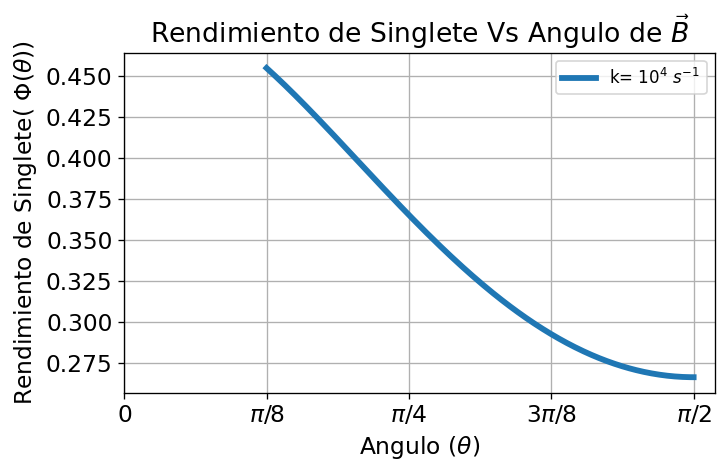

In [23]:
plt.plot(anglelist, prob.real , label='k= $10^4$ $s^{-1}$', linewidth=3.5)

plt.title(r'Rendimiento de Singlete Vs Angulo de $\vec{B}$', fontsize = 16 )
plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel(r'Rendimiento de Singlete( $\Phi (\theta) )$', fontsize = 14)
plt.legend()
plt.tight_layout()

plt.yticks(fontsize = 14)
plt.xticks([0.0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$0$', r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)


plt.savefig('Base_ST_Nu_uni_aprox1_singlet_yield_Skew.png', dpi=500)
plt.show()

In [24]:
sigmaX_up = qt.Qobj(np.matrix([[0 , 0  , 1 , 0 , 0 , 0 , 0 , 0 ,0, 0]
                             ,[0  , 0  , 0 , 1 , 0 , 0 , 0 , 0 ,0, 0]
                             ,[1  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0] 
                             ,[0  , 1  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0]
                             ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0] 
                             ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0] 
                             ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0] 
                             ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0]
                             ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0] 
                             ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0]]))

sigmaY_up = qt.Qobj(np.matrix([[0  , 0  , -1j , 0   , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0   , -1j , 0 , 0 , 0 , 0 ,0, 0]
                              ,[1j , 0  , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 1j , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0]]))

sigmaZ_up = qt.Qobj(np.matrix([[1  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 1  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , -1   , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , -1  , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0]]))

sigmaX_down = qt.Qobj(np.matrix([[0 , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0 , 0 , 0 , 0 , 1 , 0 ,0, 0] 
                              ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 1 ,0, 0] 
                              ,[0  , 0  , 0 , 0 , 1 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0 , 0 , 0 , 1 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0 , 0 , 0 , 0 , 0 , 0 ,0, 0]]))

sigmaY_down = qt.Qobj(np.matrix([[0 , 0  ,0    , 0   , 0  , 0  , 0   , 0 ,0, 0]
                               ,[0  , 0  , 0   , 0   , 0  , 0  , 0   , 0 ,0, 0]
                               ,[0  , 0  , 0   , 0   , 0  , 0  , 0   , 0 ,0, 0] 
                               ,[0  , 0  , 0   , 0   , 0  , 0  , 0   , 0 ,0, 0]
                               ,[0  , 0  , 0   , 0   , 0  , 0  , -1j , 0 ,0, 0] 
                               ,[0  , 0  , 0   , 0   , 0  , 0  , 0   , -1j ,0, 0] 
                               ,[0  , 0  , 0   , 0   , 1j , 0  , 0   , 0 ,0, 0] 
                               ,[0  , 0  , 0   , 0   , 0  , 1j , 0   , 0 ,0, 0]
                               ,[0  , 0  , 0   , 0   , 0  , 0  , 0   , 0 ,0, 0] 
                               ,[0  , 0  , 0   , 0   , 0  , 0  , 0   , 0 ,0, 0]]))

sigmaZ_down = qt.Qobj(np.matrix([[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0   , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0  , 0 , 0 , 0 , 0 ,0, 0]
                              ,[0  , 0  , 0    , 0   , 1 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0   , 0 , 1 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0   , 0 , 0 , -1 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , -1 ,0, 0]
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0] 
                              ,[0  , 0  , 0    , 0   , 0 , 0 , 0 , 0 ,0, 0]]))

In [25]:
def CalcularSkewUp(anglelist,ro,numGuardar1):
        Skew = []
        for ii in range(0,len(anglelist)):
                evals11, ekets11 =ro[ii][numGuardar1].eigenstates()#evals11, ekets11 =ro[ii][numGuardar].eigenstates()
                sigmaX_Up_base_rho = (sigmaX_up.transform(ekets11))
                sigmaY_Up_base_rho = (sigmaY_up.transform(ekets11))
                sigmaZ_Up_base_rho = (sigmaZ_up.transform(ekets11))
                roDiagonal = qt.Qobj(np.matrix([[evals11[0], 0        , 0        , 0        , 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          ,evals11[1], 0        , 0        , 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          , 0        ,evals11[2], 0        , 0        , 0        , 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        ,evals11[3], 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          , 0        , 0        , 0        ,evals11[4], 0        , 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        ,evals11[5], 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        ,evals11[6], 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        ,evals11[7],0         , 0]
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        , 0        ,evals11[8], 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        , 0        ,0         , evals11[9]]]))
                roDiagonalRaiz = qt.Qobj(np.sqrt(roDiagonal))
                g = []
                SigmasBaseRho = [sigmaX_Up_base_rho, sigmaY_Up_base_rho, sigmaZ_Up_base_rho]
                for i in range(0,3):
                    for j in range(0,3):  
                        A = roDiagonalRaiz*SigmasBaseRho[i]
                        B = roDiagonalRaiz*SigmasBaseRho[j]
                        AB = A*B 
                        g.append( AB.tr() )  
                Matriz_W_A1 = qt.Qobj(np.matrix([[g[0]  , g[1]  , g[2] ]
                                                ,[g[3]  , g[4]  , g[5] ]
                                                ,[g[6]  , g[7]  , g[8] ]]))
                evals1, ekets1 =Matriz_W_A1.eigenstates()
                Skew.append(1-np.amax(evals1))
        return Skew
#Agrege dos ceros

In [26]:
def CalcularSkewDown(anglelist,ro,numGuardar1):
        Skew= []
        for ii in range(0,len(anglelist)):
                evals11, ekets11 =ro[ii][numGuardar1].eigenstates()
                sigmaX_Down_base_rho = (sigmaX_down.transform(ekets11))
                sigmaY_Down_base_rho = (sigmaY_down.transform(ekets11))
                sigmaZ_Down_base_rho = (sigmaZ_down.transform(ekets11))
                roDiagonal = qt.Qobj(np.matrix([[evals11[0], 0        , 0        , 0        , 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          ,evals11[1], 0        , 0        , 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          , 0        ,evals11[2], 0        , 0        , 0        , 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        ,evals11[3], 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          , 0        , 0        , 0        ,evals11[4], 0        , 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        ,evals11[5], 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        ,evals11[6], 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        ,evals11[7],0         , 0]
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        , 0        ,evals11[8], 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        , 0        ,0         , evals11[9]]]))
                roDiagonalRaiz = qt.Qobj(np.sqrt(roDiagonal))
                g = []
                SigmasBaseRho = [sigmaX_Down_base_rho, sigmaY_Down_base_rho, sigmaZ_Down_base_rho]
                for i in range(0,3):
                    for j in range(0,3):  
                        A = roDiagonalRaiz*SigmasBaseRho[i]
                        B = roDiagonalRaiz*SigmasBaseRho[j]
                        AB = A*B 
                        g.append( AB.tr() ) 
                Matriz_W_A1 = qt.Qobj(np.matrix([[g[0]  , g[1]  , g[2] ]
                                                ,[g[3]  , g[4]  , g[5] ]
                                                ,[g[6]  , g[7]  , g[8] ]]))
                evals1, ekets1 =Matriz_W_A1.eigenstates()
                Skew.append(1 - np.amax(evals1))
        return Skew

In [27]:
#def CalcularSkew_Up_Down(anglelist,ro):
 #       Fisher= []
  #      for ii in range(0,len(anglelist)):
   #             evals11, ekets11 =ro[ii].eigenstates()
    #            sigmaX_up_base_rho = (sigmaX_up.transform(ekets11))
     #           sigmaY_up_base_rho = (sigmaY_up.transform(ekets11))
      #          sigmaZ_up_base_rho = (sigmaZ_up.transform(ekets11))
       #         sigmaX_down_base_rho = (sigmaX_down.transform(ekets11))
        #        sigmaY_down_base_rho = (sigmaY_down.transform(ekets11))
         #       sigmaZ_down_base_rho = (sigmaZ_down.transform(ekets11))
          #      g = []
           #     SigmasBaseRho = [sigmaX_up_base_rho, sigmaY_up_base_rho, sigmaZ_up_base_rho, sigmaX_down_base_rho, sigmaY_down_base_rho, sigmaZ_down_base_rho]
            #    roDiagonalRaiz = qt.Qobj(np.matrix([[cmath.sqrt(evals11[0]), 0                    , 0                    , 0                    , 0                    , 0                    , 0                    , 0                    ,0                     , 0]
             #                                 ,[0                     ,cmath.sqrt(evals11[1]), 0                    , 0                    , 0                    , 0                    , 0                    , 0                    ,0                     , 0]
              #                                ,[0                     , 0                    ,cmath.sqrt(evals11[2]), 0                    , 0                    , 0                    , 0                    , 0                    ,0                     , 0] 
               #                               ,[0                     , 0                    , 0                    ,cmath.sqrt(evals11[3]), 0                    , 0                    , 0                    , 0                    ,0                     , 0]
                #                              ,[0                     , 0                    , 0                    , 0                    ,cmath.sqrt(evals11[4]), 0                    , 0                    , 0                    ,0                     , 0] 
                 #                             ,[0                     , 0                    , 0                    , 0                    , 0                    ,cmath.sqrt(evals11[5]), 0                    , 0                    ,0                     , 0] 
                  #                            ,[0                     , 0                    , 0                    , 0                    , 0                    , 0                    ,cmath.sqrt(evals11[6]), 0                    ,0                     , 0] 
                   #                           ,[0                     , 0                    , 0                    , 0                    , 0                    , 0                    , 0                    ,cmath.sqrt(evals11[7]),0                     , 0]
                    #                          ,[0                     , 0                    , 0                    , 0                    , 0                    , 0                    , 0                    , 0                    ,cmath.sqrt(evals11[8]), 0] 
                     #                         ,[0                     , 0                    , 0                    , 0                    , 0                    , 0                    , 0                    , 0                    ,0                     , cmath.sqrt(evals11[9])]]))
                #roDiagonal = qt.Qobj(np.matrix([[evals11[0], 0        , 0                    , 0                    , 0                    , 0                    , 0                    , 0                    ,0                     , 0]
                 #                             ,[0          ,evals11[1], 0        , 0        , 0        , 0        , 0        , 0        ,0         , 0]
                  #                            ,[0          , 0        ,evals11[2], 0        , 0        , 0        , 0        , 0        ,0         , 0] 
                   #                           ,[0          , 0        , 0        ,evals11[3], 0        , 0        , 0        , 0        ,0         , 0]
                    #                          ,[0          , 0        , 0        , 0        ,evals11[4], 0        , 0        , 0        ,0         , 0] 
                     #                         ,[0          , 0        , 0        , 0        , 0        ,evals11[5], 0        , 0        ,0         , 0] 
                      #                        ,[0          , 0        , 0        , 0        , 0        , 0        ,evals11[6], 0        ,0         , 0] 
                       #                       ,[0          , 0        , 0        , 0        , 0        , 0        , 0        ,evals11[7],0         , 0]
                        #                      ,[0          , 0        , 0        , 0        , 0        , 0        , 0        , 0        ,evals11[8], 0] 
                         #                     ,[0          , 0        , 0        , 0        , 0        , 0        , 0        , 0        ,0         , evals11[9]]]))
                #for i in range(0,6):
                 #   for j in range(0,6):                     
                  #      A = roDiagonalRaiz*SigmasBaseRho[i]*roDiagonalRaiz*SigmasBaseRho[i] 
                   #     B = roDiagonalRaiz*SigmasBaseRho[i]*roDiagonalRaiz*SigmasBaseRho[j] 
                    #    C = roDiagonalRaiz*SigmasBaseRho[j]*roDiagonalRaiz*SigmasBaseRho[i] 
                     #   D = roDiagonalRaiz*SigmasBaseRho[j]*roDiagonalRaiz*SigmasBaseRho[j]
                      #  F = roDiagonal*SigmasBaseRho[i]*SigmasBaseRho[j]
                       # H = roDiagonal*SigmasBaseRho[j]*SigmasBaseRho[i]
                        #ABCD = A + B +C + D 
                        #FH = F + H
                        #g.append( FH.tr() - ABCD.tr() )
                #Matriz_W_A1 = qt.Qobj(np.matrix([[g[0]  , g[1]  , g[2]  , g[3]  , g[4]  , g[5]]
                 #                               ,[g[6]  , g[7]  , g[8]  , g[9]  , g[10] , g[11]]
                  #                              ,[g[12] , g[13] , g[14] , g[15] , g[16] , g[17]]
                   #                             ,[g[18] , g[19] , g[20] , g[21] , g[22] , g[23]]
                    #                            ,[g[24] , g[25] , g[26] , g[27] , g[28] , g[29]]
                     #                           ,[g[30] , g[31] , g[32] , g[33] , g[34] , g[35]]]))
                #evals1, ekets1 =Matriz_W_A1.eigenstates()
                #Fisher.append(2 - np.amax(evals1))
        #return Fisher

In [28]:
def CalcularSkew_Up_Down(anglelist,ro,numGuardar1):
        Fisher= []
        for ii in range(0,len(anglelist)):
                evals11, ekets11 =ro[ii][numGuardar1].eigenstates()
                sigmaX_up_base_rho = (sigmaX_up.transform(ekets11))
                sigmaY_up_base_rho = (sigmaY_up.transform(ekets11))
                sigmaZ_up_base_rho = (sigmaZ_up.transform(ekets11))
                sigmaX_down_base_rho = (sigmaX_down.transform(ekets11))
                sigmaY_down_base_rho = (sigmaY_down.transform(ekets11))
                sigmaZ_down_base_rho = (sigmaZ_down.transform(ekets11))
                roDiagonal = qt.Qobj(np.matrix([[evals11[0], 0        , 0        , 0        , 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          ,evals11[1], 0        , 0        , 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          , 0        ,evals11[2], 0        , 0        , 0        , 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        ,evals11[3], 0        , 0        , 0        , 0        ,0         , 0]
                                              ,[0          , 0        , 0        , 0        ,evals11[4], 0        , 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        ,evals11[5], 0        , 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        ,evals11[6], 0        ,0         , 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        ,evals11[7],0         , 0]
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        , 0        ,evals11[8], 0] 
                                              ,[0          , 0        , 0        , 0        , 0        , 0        , 0        , 0        ,0         , evals11[9]]]))
                roDiagonalRaiz = qt.Qobj(np.sqrt(roDiagonal))
                g = []
                SigmasBaseRho = [sigmaX_up_base_rho, sigmaY_up_base_rho, sigmaZ_up_base_rho, sigmaX_down_base_rho, sigmaY_down_base_rho, sigmaZ_down_base_rho]
                for i in range(0,6):
                    for j in range(0,6):                     
                        A = roDiagonalRaiz*(SigmasBaseRho[i]) 
                        B = roDiagonalRaiz*(SigmasBaseRho[j]) 
                        AB = A*B
                        g.append( AB.tr() )
                Matriz_W_A1 = qt.Qobj(np.matrix([[g[0]  , g[1]  , g[2]  , g[3]  , g[4]  , g[5]]
                                                ,[g[6]  , g[7]  , g[8]  , g[9]  , g[10] , g[11]]
                                                ,[g[12] , g[13] , g[14] , g[15] , g[16] , g[17]]
                                                ,[g[18] , g[19] , g[20] , g[21] , g[22] , g[23]]
                                                ,[g[24] , g[25] , g[26] , g[27] , g[28] , g[29]]
                                                ,[g[30] , g[31] , g[32] , g[33] , g[34] , g[35]]]))
                evals1, ekets1 =Matriz_W_A1.eigenstates()
                Skew.append(1 - np.amax(evals1))
        return Skew

## Caso 1 : $H = H_{A}$

\begin{equation}
   \begin{aligned}
    H_{A} = \boldsymbol{n}_{\uparrow} \cdot \boldsymbol{\sigma}_{\uparrow} 
    \end{aligned}
\end{equation}

In [29]:
Skew1_up = []; Skew2_up = []; Skew3_up = []; Skew4_up = []; Skew5_up = []; Skew6_up = []; Skew7_up = [];  Skew8_up = [];  Skew9_up = [];

In [30]:
Skew_up = []

In [31]:
Skew_up= CalcularSkewDown(anglelist,ro3,999)
Sk_up = np.array(Skew_up)

In [32]:
Skew1_up= CalcularSkewDown(anglelist,ro3,499)
Sk1_up = np.array(Skew1_up)

In [33]:
Skew2_up= CalcularSkewDown(anglelist,ro3,399)
Sk2_up = np.array(Skew2_up)

In [34]:
Skew3_up= CalcularSkewDown(anglelist,ro3,249)
Sk3_up = np.array(Skew3_up)

In [35]:
Skew4_up= CalcularSkewDown(anglelist,ro3,209)
Sk4_up = np.array(Skew4_up)

In [36]:
Skew5_up= CalcularSkewDown(anglelist,ro3,179)
Sk5_up = np.array(Skew5_up)

In [37]:
Skew6_up= CalcularSkewDown(anglelist,ro3,175)
Sk6_up = np.array(Skew6_up)

In [38]:
Skew7_up= CalcularSkewDown(anglelist,ro3,174)
Sk7_up = np.array(Skew7_up)

In [39]:
Skew8_up= CalcularSkewDown(anglelist,ro3,99)
Sk8_up = np.array(Skew8_up)

In [40]:
Skew9_up= CalcularSkewDown(anglelist,ro3,0)
Sk9_up = np.array(Skew9_up)

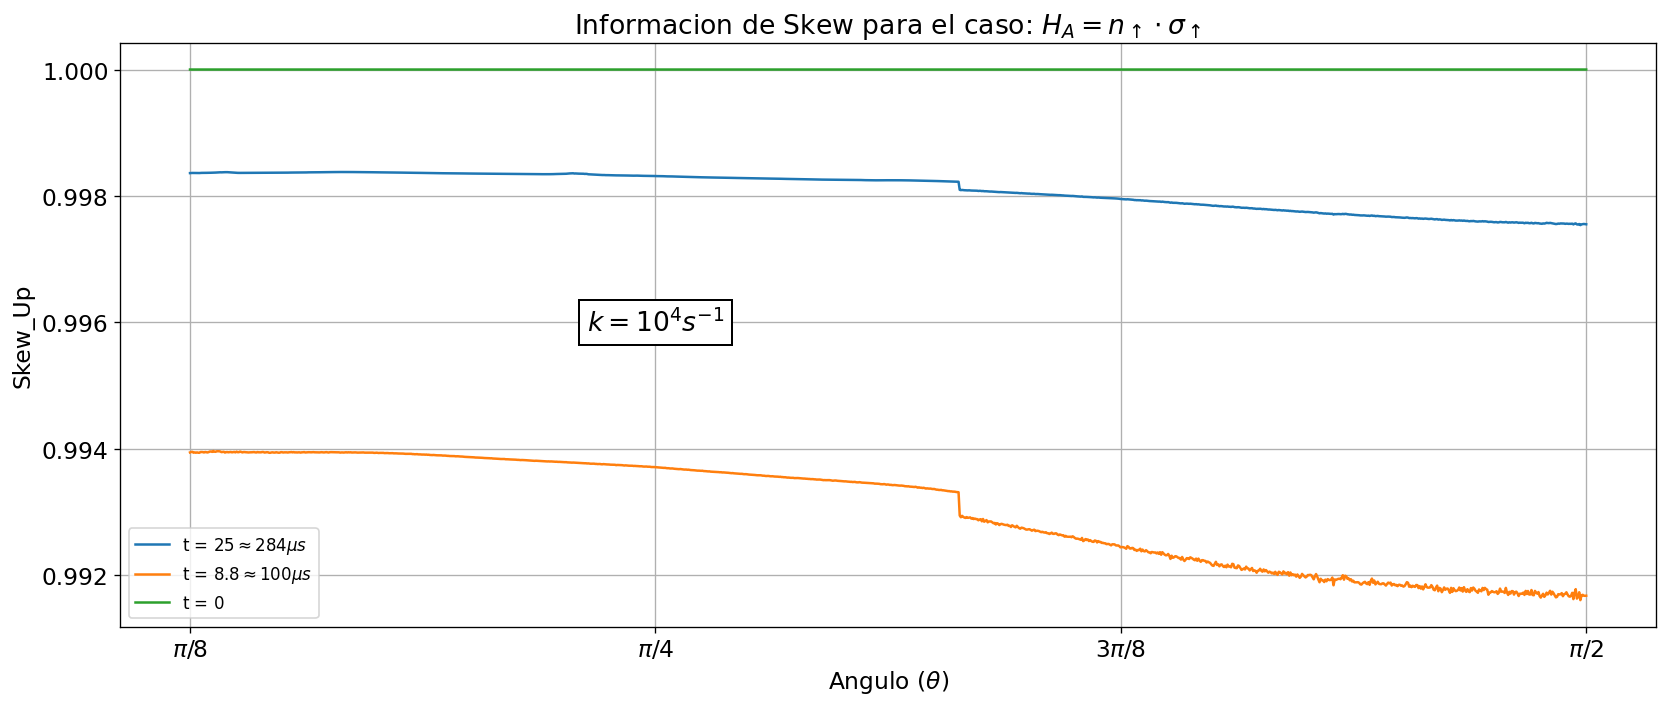

In [41]:
plt.figure(figsize = (14,6))
plt.title(r'Informacion de Skew para el caso: $H_{A} = n_{\uparrow} \cdot \sigma_{\uparrow}$', fontsize = 16 )

#plt.plot(anglelist,Sk_up.real, label= r't = $50 \approx 568 \mu s$', linewidth=1.5)
#plt.plot(anglelist,Sk2_up.real, label= r't = $35 \approx 398 \mu s$' , linewidth=1.5)
plt.plot(anglelist,Sk1_up.real, label= r't = $25 \approx 284 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk2_up.real, label= r't = $15 \approx 170 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk3_up.real, label= r't = $12.5  \approx 142  \mu s$'   , linewidth=1.5)
#plt.plot(anglelist,Sk4_up.real, label= r't = $10.5  \approx 119  \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk5_up.real, label= r't = $9  \approx 102  \mu s$'  , linewidth=1.5)
plt.plot(anglelist,Sk6_up.real, label= r't = $8.8  \approx 100  \mu s$', linewidth=1.5)
#plt.plot(anglelist,Sk7_up.real, label= r't = $8.75  \approx 99.5  \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk8_up.real, label= r't = $5  \approx 56  \mu s$'  , linewidth=1.5)
plt.plot(anglelist,Sk9_up.real, label= r't = $0$' , linewidth=1.5)


plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel('Skew_Up', fontsize = 14)
plt.legend()

plt.yticks(fontsize = 14)
plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)

plt.text( np.pi/4 , 0.996, r'$ k = 1.5 \times 10^4  s^{-1}$', ha="center", va="center", size=16,
    bbox=dict(boxstyle="Square,pad=0.3", fc="white" , lw=1.2)) #ec="b" 

plt.legend()

        
plt.tight_layout()


plt.savefig('k_10_4_mas_Eficiencia_acumulada_Traza_aprox1_Skew_up.png', dpi=500)
plt.show()

In [42]:
AreaUP2 = []
for jj in range(0,NumAngle):
     AreaUP2.append( (1 - Sk1_up[jj] )/25.0 )

In [43]:
AreaUP50 = []
for jj in range(0,NumAngle):
     AreaUP50.append( (1 - Sk_up[jj] )/50.0 )

In [44]:
AreaUP100 = []
for jj in range(0,NumAngle):
     AreaUP100.append( (1 - Sk6_up[jj] )/8.8 )

In [45]:
        
AreaUP105 = []
for jj in range(0,NumAngle):
     AreaUP105.append( (1 - Sk4_up[jj] )/10.5 )

/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


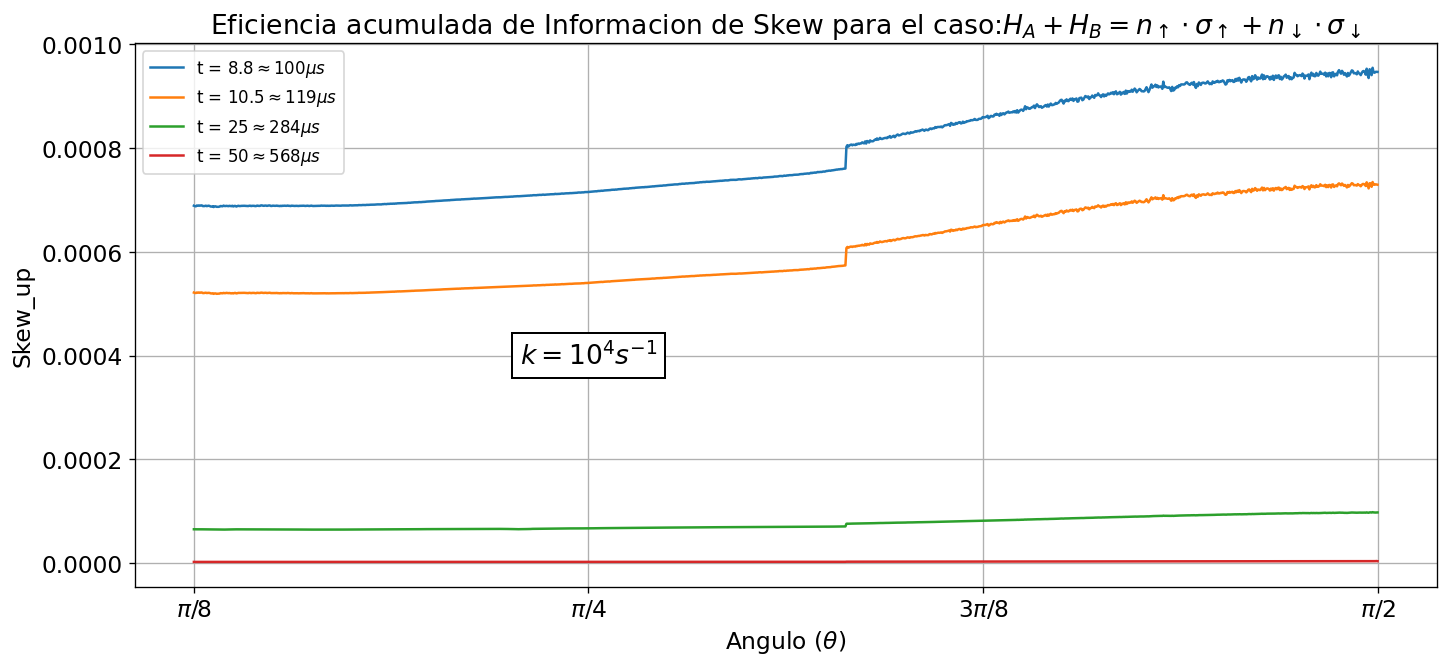

In [46]:
plt.figure(figsize = (14,6))
plt.title(r'Eficiencia acumulada de Informacion de Skew para el caso:$H_{A} + H_{B} =n_{\uparrow} \cdot \sigma_{\uparrow}  +  n_{\downarrow} \cdot \sigma_{\downarrow} $', fontsize = 16 )

plt.plot(anglelist,AreaUP100, label=r't = $8.8  \approx 100  \mu s$' , linewidth=1.5)
plt.plot(anglelist,AreaUP105, label=r't = $10.5  \approx 119  \mu s$' , linewidth=1.5)
plt.plot(anglelist,AreaUP2, label=r't = $25 \approx 284 \mu s$', linewidth=1.5)
plt.plot(anglelist,AreaUP50, label=r't = $50 \approx 568 \mu s$', linewidth=1.5)


plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel('Skew_up', fontsize = 14)
#plt.ylim(0.9995,1.00005)
plt.text( np.pi/4 , 0.0004, r'$ k = 1.5 \times 10^4  s^{-1}$', ha="center", va="center", size=16,
    bbox=dict(boxstyle="Square,pad=0.3", fc="white" , lw=1.2)) #ec="b" 
plt.legend()

           
plt.yticks(fontsize = 14)
plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)

plt.savefig('k_10_4_mas__Eficiencia_Acumulada_Skew_up_Distintos_tiempos.png', dpi=500)
plt.show()

## Caso 2 : $H = H_{B}$

\begin{equation}
   \begin{aligned}
    H_{B} = \boldsymbol{n}_{\downarrow} \cdot \boldsymbol{\sigma}_{\downarrow} 
    \end{aligned}
\end{equation}

In [47]:
Skew1_down = []; Skew2_down = []; Skew3_down = []; Skew4_down = []; Skew5_down = []; Skew6_down = []; Skew7_down = []; Skew8_down = []; Skew9_down = [];

In [48]:
Skew_down = [];

In [49]:
Skew_down = CalcularSkewDown(anglelist,ro3,999)
Sk_down = np.array(Skew_down)

In [50]:
Skew1_down = CalcularSkewDown(anglelist,ro3,499)
Sk1_down = np.array(Skew1_down)

In [51]:
Skew2_down = CalcularSkewDown(anglelist,ro3,399)
Sk2_down = np.array(Skew2_down)

In [52]:
Skew3_down = CalcularSkewDown(anglelist,ro3,249)
Sk3_down = np.array(Skew3_down)

In [53]:
Skew4_down = CalcularSkewDown(anglelist,ro3,209)
Sk4_down = np.array(Skew4_down)

In [54]:
Skew5_down = CalcularSkewDown(anglelist,ro3,179)
Sk5_down = np.array(Skew5_down)

In [55]:
Skew6_down = CalcularSkewDown(anglelist,ro3,175)
Sk6_down = np.array(Skew6_down)

In [56]:
Skew7_down = CalcularSkewDown(anglelist,ro3,174)
Sk7_down = np.array(Skew7_down)

In [57]:
Skew8_down = CalcularSkewDown(anglelist,ro3,99)
Sk8_down = np.array(Skew8_down)

In [58]:
Skew9_down = CalcularSkewDown(anglelist,ro3,0)
Sk9_down = np.array(Skew9_down)

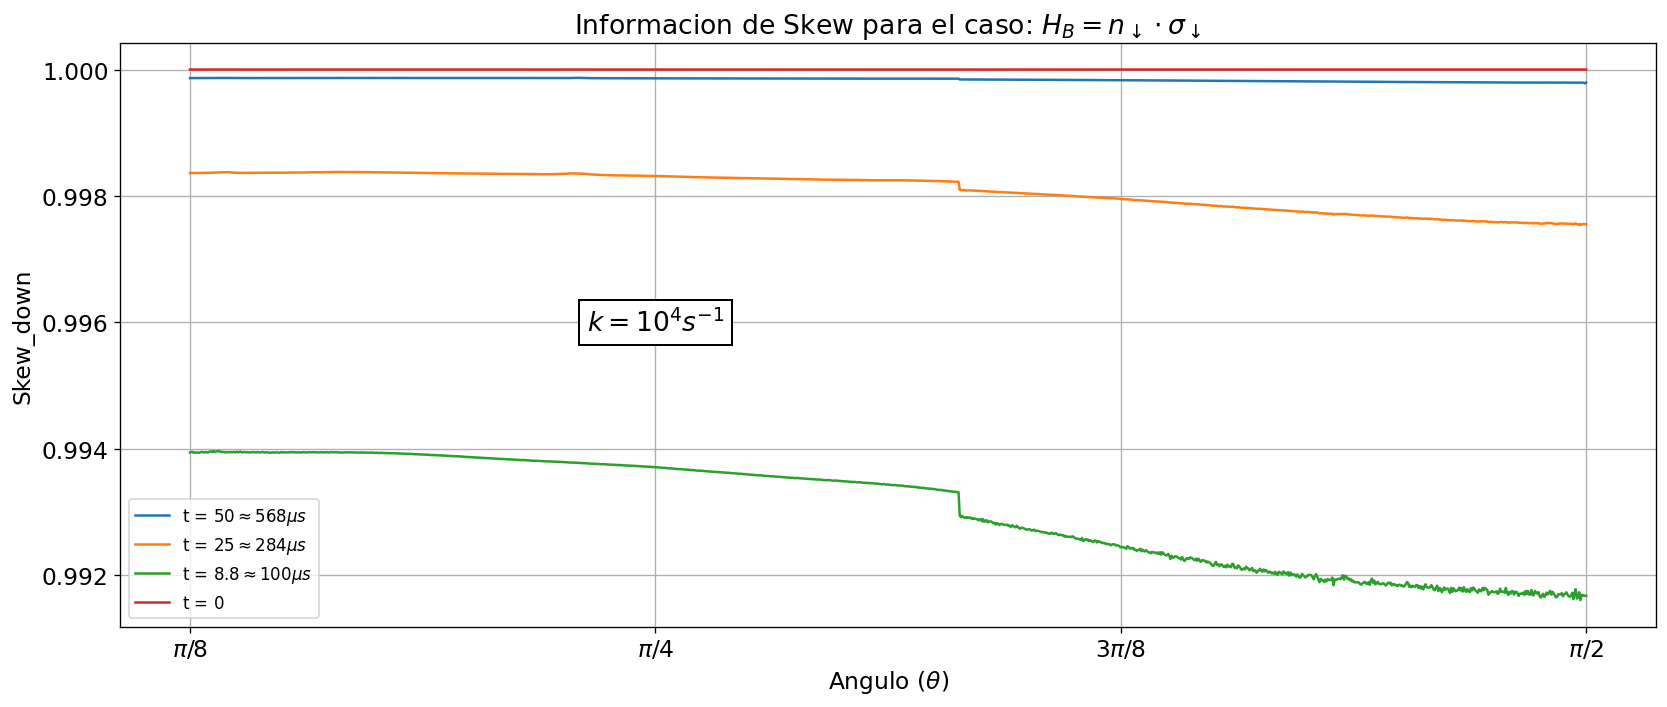

In [59]:
plt.figure(figsize = (14,6))
plt.title(r'Informacion de Skew para el caso: $H_{B} = n_{\downarrow} \cdot  \sigma_{\downarrow}$', fontsize = 16 )
plt.plot(anglelist,Sk_down.real, label=r't = $50 \approx 568 \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk2_down.real, label=r't = $35 \approx 398 \mu s$'  , linewidth=1.5)
plt.plot(anglelist,Sk1_down.real, label=r't = $25 \approx 284 \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk2_down.real, label=r't = $15 \approx 170 \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk3_down.real, label=r't = $12.5  \approx 142  \mu s$'   , linewidth=1.5)
#plt.plot(anglelist,Sk4_down.real, label=r't = $10.5  \approx 119  \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk5_down.real, label=r't = $9  \approx 102  \mu s$'  , linewidth=1.5)
plt.plot(anglelist,Sk6_down.real, label=r't = $8.8  \approx 100  \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk7_down.real, label=r't = $8.75  \approx 99.5  \mu s$'  , linewidth=1.5)
#plt.plot(anglelist,Sk8_down.real, label=r't = $5  \approx 56  \mu s$' , linewidth=1.5)
plt.plot(anglelist,Sk9_down.real, label=r't = $0$'  , linewidth=1.5)


plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel('Skew_down', fontsize = 14)
plt.text( np.pi/4 , 0.996, r'$ k = 1.5 \times 10^4  s^{-1}$', ha="center", va="center", size=16,
    bbox=dict(boxstyle="Square,pad=0.3", fc="white" , lw=1.2)) #ec="b" 
plt.legend()

plt.yticks(fontsize = 14)
plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)
plt.tight_layout()

plt.savefig('k_10_4_mas_Eficiencia_Acumulada_Traza_Skew_down.png', dpi=500)
plt.show()

In [60]:
AreaDown2 = []
for jj in range(0,NumAngle):
     AreaDown2.append( (1 - Sk1_down[jj] )/25.0 )

In [61]:
AreaDown50 = []
for jj in range(0,NumAngle):
     AreaDown50.append( (1 - Sk_down[jj] )/50.0 )

In [62]:
AreaDown100 = []
for jj in range(0,NumAngle):
     AreaDown100.append( (1 - Sk6_down[jj] )/8.8 )

In [63]:
AreaDown105 = []
for jj in range(0,NumAngle):
     AreaDown105.append( (1 - Sk4_down[jj] )/10.5 )

/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


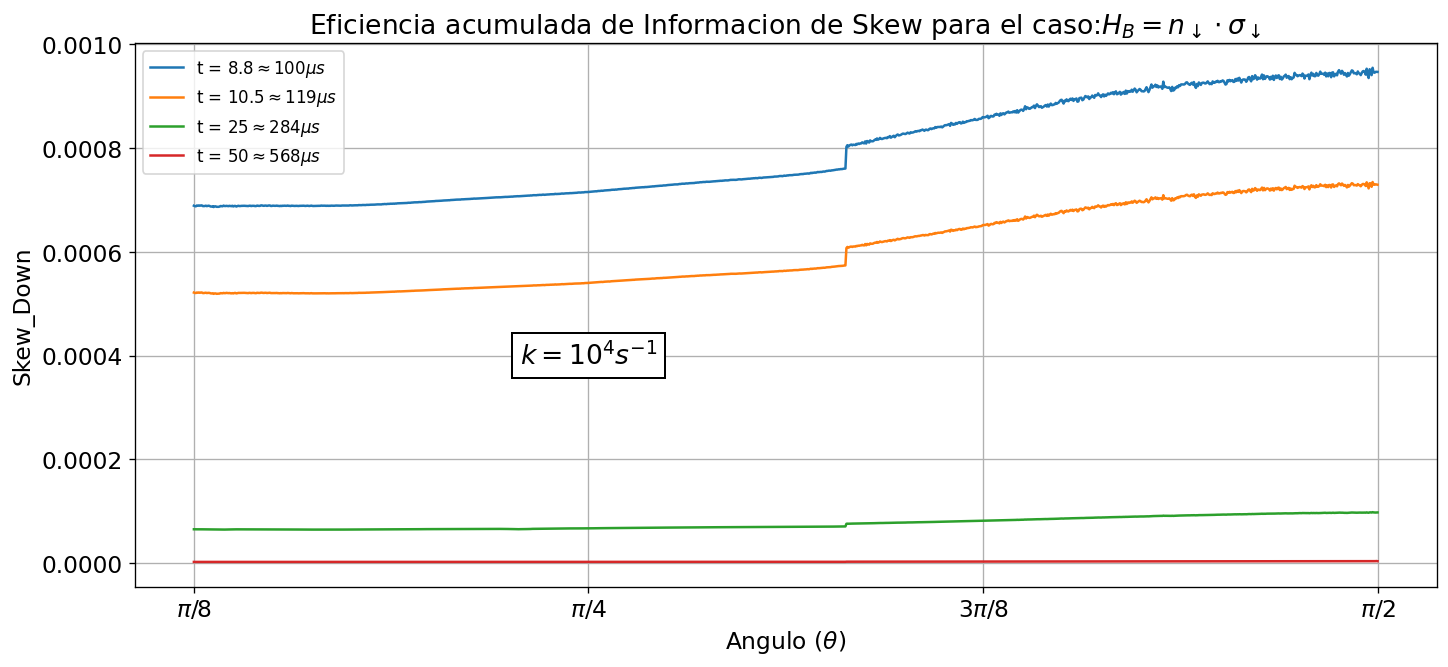

In [64]:
plt.figure(figsize = (14,6))
plt.title(r'Eficiencia acumulada de Informacion de Skew para el caso:$ H_{B} =  n_{\downarrow} \cdot \sigma_{\downarrow} $', fontsize = 16 )

plt.plot(anglelist,AreaDown100, label=r't = $8.8  \approx 100  \mu s$' , linewidth=1.5)
plt.plot(anglelist,AreaDown105, label=r't = $10.5  \approx 119  \mu s$' , linewidth=1.5)
plt.plot(anglelist,AreaDown2, label=r't = $25 \approx 284 \mu s$', linewidth=1.5)
plt.plot(anglelist,AreaDown50, label=r't = $50 \approx 568 \mu s$', linewidth=1.5)


plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel('Skew_Down', fontsize = 14)
#plt.ylim(0.9995,1.00005)
plt.text( np.pi/4 , 0.0004, r'$ k = 1.5 \times 10^4  s^{-1}$', ha="center", va="center", size=16,
    bbox=dict(boxstyle="Square,pad=0.3", fc="white" , lw=1.2)) #ec="b" 
plt.legend()

           
plt.yticks(fontsize = 14)
plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)

plt.savefig('k_10_4_mas_Eficiencia_Acumulada_Skew_down_Distintos_tiempos.png', dpi=500)
plt.show()

## Caso 3 : $H = H_{A} + H_{B}$

\begin{equation}
   \begin{aligned}
    H_{A} + H_{B} =\boldsymbol{n}_{\uparrow} \cdot \boldsymbol{\sigma}_{\uparrow}  +  \boldsymbol{n}_{\downarrow} \cdot \boldsymbol{\sigma}_{\downarrow} 
    \end{aligned}
\end{equation}

In [65]:
Skew1_up_down = []; Skew2_up_down = []; Skew3_up_down = []; Skew4_up_down = []; Skew5_up_down = []; Skew6_up_down = []; Skew7_up_down = []; Skew8_up_down = []; Skew9_up_down = [];

In [66]:
Skew10_up_down = [];

In [67]:
Skew_up_down = [];

In [68]:
Skew_up_down  = CalcularSkewDown(anglelist,ro3,999)
Sk_up_down = np.array(Skew_up_down)

In [69]:
#Skew2_up_down  = CalcularSkewDown(anglelist,ro3,699)
#Sk2_up_down = np.array(Skew2_up_down)

In [70]:
Skew1_up_down  = CalcularSkewDown(anglelist,ro3,499)
Sk1_up_down = np.array(Skew1_up_down)

In [71]:
Skew2_up_down  = CalcularSkewDown(anglelist,ro3,399)
Sk2_up_down = np.array(Skew2_up_down)

In [72]:
Skew3_up_down  = CalcularSkewDown(anglelist,ro3,249)
Sk3_up_down = np.array(Skew3_up_down)

In [73]:
Skew4_up_down  = CalcularSkewDown(anglelist,ro3,209)
Sk4_up_down = np.array(Skew4_up_down)

In [74]:
Skew5_up_down  = CalcularSkewDown(anglelist,ro3,179)
Sk5_up_down = np.array(Skew5_up_down)

In [75]:
Skew6_up_down  = CalcularSkewDown(anglelist,ro3,175)
Sk6_up_down = np.array(Skew6_up_down)

In [76]:
Skew7_up_down  = CalcularSkewDown(anglelist,ro3,174)
Sk7_up_down = np.array(Skew7_up_down)

In [77]:
Skew8_up_down  = CalcularSkewDown(anglelist,ro3,99)
Sk8_up_down = np.array(Skew8_up_down)

In [78]:
Skew9_up_down  = CalcularSkewDown(anglelist,ro3,0)
Sk9_up_down = np.array(Skew9_up_down)

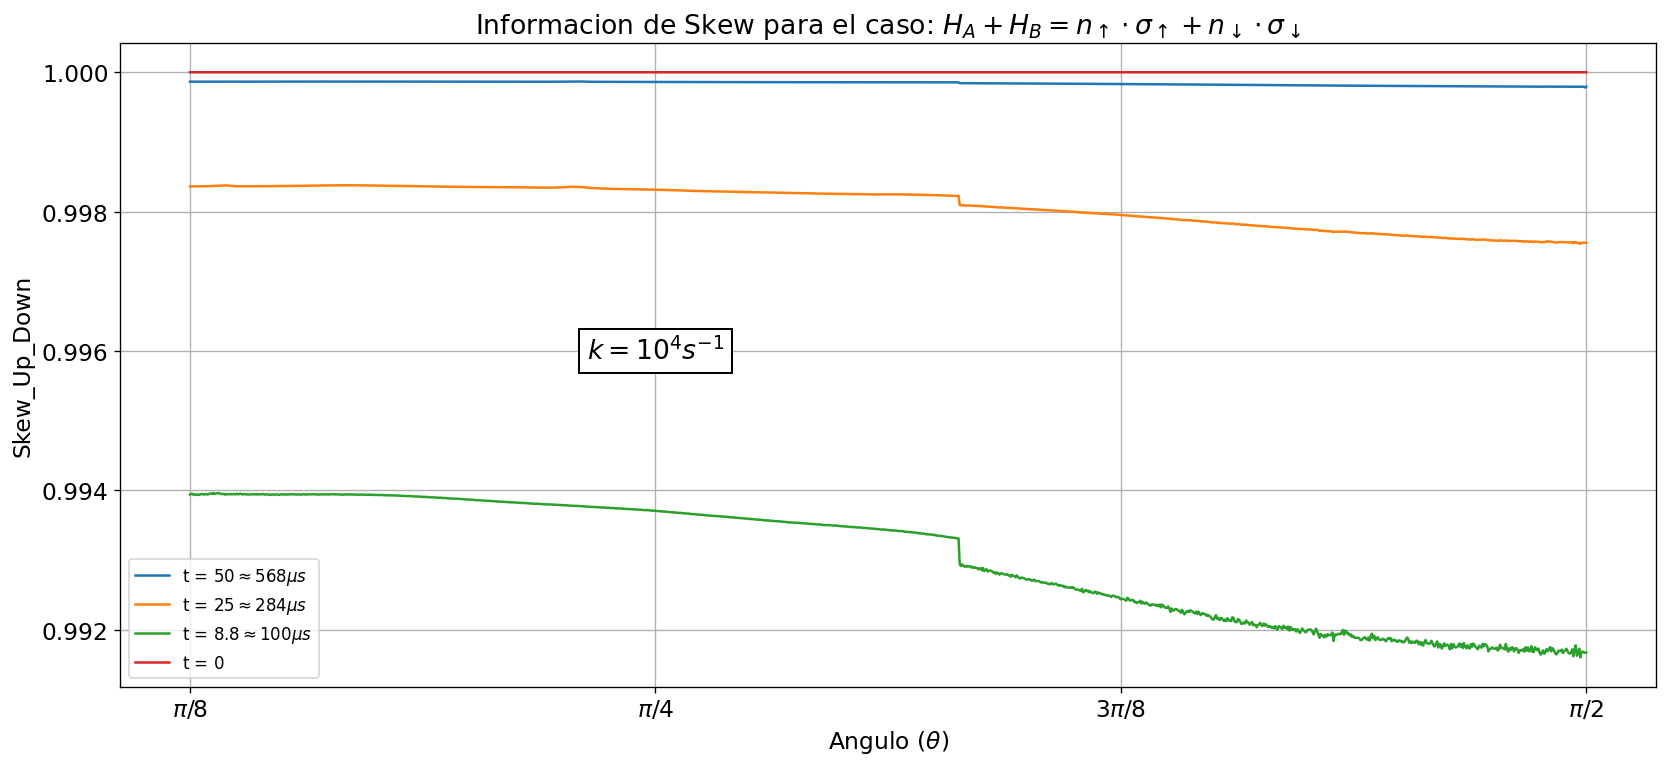

In [79]:
plt.figure(figsize = (14,6.5))
plt.title(r'Informacion de Skew para el caso: $H_{A} + H_{B} =n_{\uparrow} \cdot \sigma_{\uparrow}  +  n_{\downarrow} \cdot \sigma_{\downarrow} $', fontsize = 16 )
plt.plot(anglelist,Sk_up_down.real, label=r't = $50 \approx 568 \mu s$' , linewidth=1.5)
plt.plot(anglelist,Sk1_up_down.real, label=r't = $25 \approx 284 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk2_up_down.real, label=r't = $15 \approx 170 \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk3_up_down.real, label=r't = $12.5  \approx 142  \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk4_up_down.real, label=r't = $10.5  \approx 119  \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk5_up_down.real, label=r't = $9  \approx 102  \mu s$' , linewidth=1.5)
plt.plot(anglelist,Sk6_up_down.real, label=r't = $8.8  \approx 100  \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk7_up_down.real, label=r't = $8.75  \approx 99.5  \mu s$' , linewidth=1.5)
#plt.plot(anglelist,Sk8_up_down.real, label=r't = $5  \approx 56  \mu s$' , linewidth=1.5)
plt.plot(anglelist,Sk9_up_down.real, label=r't = $0$' , linewidth=1.5)


plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel('Skew_Up_Down', fontsize = 14)
plt.text( np.pi/4 , 0.996, r'$ k = 1.5 \times 10^4  s^{-1}$', ha="center", va="center", size=16,
    bbox=dict(boxstyle="Square,pad=0.3", fc="white" , lw=1.2)) #ec="b" 
plt.legend()


plt.yticks(fontsize = 14)
plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)
plt.tight_layout()

plt.savefig('k_10_4_mas_Eficiencia_Acumulada_Traza_Skew_up_down.png', dpi=500)
plt.show()


In [80]:
AreaDownUP2 = []
for jj in range(0,NumAngle):
     AreaDownUP2.append( (1 - Sk1_up_down[jj] )/25.0 )

In [81]:
AreaDownUP50 = []
for jj in range(0,NumAngle):
     AreaDownUP50.append( (1 - Sk_up_down[jj] )/50.0 )

In [82]:
AreaDownUP100 = []
for jj in range(0,NumAngle):
     AreaDownUP100.append( (1 - Sk6_up_down[jj] )/8.8 )

In [83]:
AreaDownUP105 = []
for jj in range(0,NumAngle):
     AreaDownUP105.append( (1 - Sk4_up_down[jj] )/10.5 )

/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/onofre/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


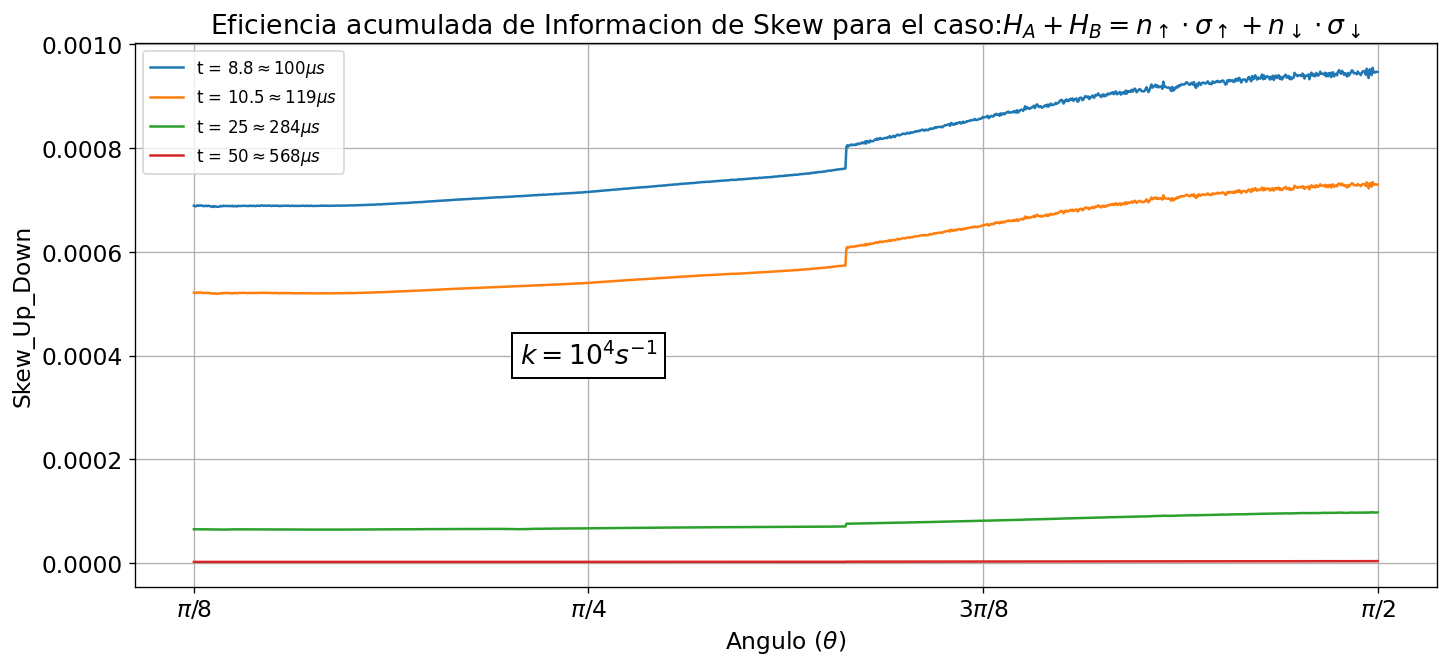

In [84]:
plt.figure(figsize = (14,6))
plt.title(r'Eficiencia acumulada de Informacion de Skew para el caso:$H_{A} + H_{B} =n_{\uparrow} \cdot \sigma_{\uparrow}  +  n_{\downarrow} \cdot \sigma_{\downarrow} $', fontsize = 16 )

plt.plot(anglelist,AreaDownUP100, label=r't = $8.8  \approx 100  \mu s$' , linewidth=1.5)
plt.plot(anglelist,AreaDownUP105, label=r't = $10.5  \approx 119  \mu s$' , linewidth=1.5)
plt.plot(anglelist,AreaDownUP2, label=r't = $25 \approx 284 \mu s$', linewidth=1.5)
plt.plot(anglelist,AreaDownUP50, label=r't = $50 \approx 568 \mu s$', linewidth=1.5)


plt.grid()
plt.xlabel(r'Angulo ($\theta$)', fontsize = 14)
plt.ylabel('Skew_Up_Down', fontsize = 14)
plt.text( np.pi/4 , 0.0004, r'$ k = 1.5 \times 10^4 s^{-1}$', ha="center", va="center", size=16,
    bbox=dict(boxstyle="Square,pad=0.3", fc="white" , lw=1.2)) #ec="b" 
#plt.ylim(0.9995,1.00005)
plt.legend()

           
plt.yticks(fontsize = 14)
plt.xticks([np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
           [r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$' ], fontsize = 14)

plt.savefig('k_10_4_mas_Eficiencia_Acumulada_Skew_up_down_Distintos_tiempos.png', dpi=500)
plt.show()

In [85]:
time.time() - start_time

2672.6075160503387